In [2]:
import numpy as np
import os
import pandas as pd

## Ingesta de datos

IMPORTAMOS DATOS DE TRMS

In [3]:
#iMPORTAMOS LOS DATOS PARA TMRS
df_TRM = pd.read_csv("TRM_historico.csv")
df_TRM["fecha_inicial"] = pd.to_datetime(df_TRM['VIGENCIADESDE'])
df_TRM["final"] = pd.to_datetime(df_TRM['VIGENCIAHASTA'])
df_TRM = df_TRM.drop("VIGENCIADESDE",axis=1)
df_TRM = df_TRM.drop("VIGENCIAHASTA",axis=1)
df_TRM = df_TRM.drop("UNIDAD",axis=1)

#LIMPIAMOS LOS DATOS
final=pd.DataFrame(columns=['fecha', 'TRM'])
for i in range(0,len(df_TRM)):
    if df_TRM["fecha_inicial"][i] == df_TRM["final"][i]:
        final = final.append({'fecha':df_TRM["fecha_inicial"][i],"TRM":df_TRM["VALOR"][i]}, ignore_index=True)
    else:
        final = final.append({'fecha':df_TRM["fecha_inicial"][i],"TRM":df_TRM["VALOR"][i]}, ignore_index=True)
        fecha = df_TRM["fecha_inicial"][i] + pd.Timedelta(days=1)
        if fecha == df_TRM["final"][i]:
            final = final.append({'fecha':fecha,"TRM":df_TRM["VALOR"][i]}, ignore_index=True)
        else:
            final = final.append({'fecha':fecha,"TRM":df_TRM["VALOR"][i]}, ignore_index=True)
            fecha = fecha + pd.Timedelta(days=1)
            if fecha == df_TRM["final"][i]:
                final = final.append({'fecha':fecha,"TRM":df_TRM["VALOR"][i]}, ignore_index=True)
            else:
                final = final.append({'fecha':fecha,"TRM":df_TRM["VALOR"][i]}, ignore_index=True)
                fecha = fecha + pd.Timedelta(days=1)
                final = final.append({'fecha':fecha,"TRM":df_TRM["VALOR"][i]}, ignore_index=True)

final["fecha"] = pd.to_datetime(final["fecha"])

#agruparmos la TRM por mes
final = final.groupby(final['fecha'].dt.to_period('M')).mean()
df_TRM = final


Importamos los datos de IPP

In [4]:
#Importamos datos IPP
df_ipp = pd.read_csv("IPP_MARZO_2023.csv",delimiter=";")

#agruparmos la ipp por mes
df_ipp['Fecha'] = pd.to_datetime(df_ipp['Fecha'])
df_ipp = df_ipp.groupby(df_ipp['Fecha'].dt.to_period('M')).mean()
df_ipp.head()

,Oferta_interna
Fecha,
1999-06,49.29
1999-07,50.14
1999-08,50.93
1999-09,51.67
1999-10,52.16


Importamos los datos de embalse

In [5]:
#Cargamos datos embalse
#embalse
df_embalse = pd.read_csv("volumen_diario.csv")
df_embalse = df_embalse.drop("Unnamed: 0",axis=1)
df_embalse = df_embalse.drop("Id",axis=1)

#cambiamos el tipo de fecha
df_embalse["fecha"] = pd.to_datetime(df_embalse['Date'])
df_embalse = df_embalse.drop("Date",axis=1)

#Definimos la variable que usaremos
df_embalse.rename(columns={'Value': 'Niveles_embalse'}, inplace=True)

#agrupamos los datos por fecha (mes y anno)
df_embalse = df_embalse.groupby(df_embalse['fecha'].dt.to_period('M')).mean()
df_embalse.head()

,Niveles_embalse
fecha,
2019-01,1.695366e+10
2019-02,1.695366e+10
2019-03,1.695327e+10
2019-04,1.695338e+10
2019-05,1.695344e+10


Importamos el valor del brent

In [6]:
df_brent = pd.read_excel("brent_historico.xlsx")

#Seleccionamos las columnas que nos interesa
df_brent = df_brent[["Fecha","Cierre*"]]

#transformamos datos
df_brent["Fecha"] = pd.to_datetime(df_brent['Fecha'])
df_brent.rename(columns={'Cierre*': 'precio_cierre_brent'}, inplace=True)

#Agrupamos por mes
df_brent = df_brent.groupby(df_brent['Fecha'].dt.to_period('M')).mean()
df_brent.head()

,precio_cierre_brent
Fecha,
2010-01,71.46
2010-02,77.59
2010-03,82.70
2010-04,87.44
2010-05,74.02


Importamos el valor del carbon

In [7]:
df_carbon = pd.read_csv("CARBON_HISTORICO.csv")

#Seleccionamos las columnas que nos interesa
df_carbon = df_carbon[["Date","Close"]]

#transformamos datos
df_carbon["Fecha"] = pd.to_datetime(df_carbon['Date'])
df_carbon = df_carbon.drop("Date",axis=1)
df_carbon.rename(columns={'Close': 'precio_cierre_carbon'}, inplace=True)

#Agrupamos por mes
df_carbon = df_carbon.groupby(df_carbon['Fecha'].dt.to_period('M')).mean()

df_carbon.head()

,precio_cierre_carbon
Fecha,
2017-12,0.000275
2018-01,0.000395
2018-02,0.000261
2018-03,0.000145
2018-04,0.000092


Cargamos los datos de gas natural

In [8]:
df_gn = pd.read_excel("gas_natura_ng_historico.xlsx")


#Seleccionamos las columnas que nos interesa
df_gn = df_gn[["Fecha","Cierre*"]]

#transformamos datos
df_gn["Fecha"] = pd.to_datetime(df_gn['Fecha'])
df_gn.rename(columns={'Cierre*': 'precio_cierre_gn'}, inplace=True)

#Agrupamos por mes
df_gn = df_gn.groupby(df_gn['Fecha'].dt.to_period('M')).mean()

df_gn.head()

,precio_cierre_gn
Fecha,
2015-01,26910.0
2015-04,27510.0
2015-05,26420.0
2015-06,28320.0
2015-07,27160.0


Unimos todos los indicadores en una sola tabla como index se utiliza la fecha

In [9]:
indicadores = df_gn.join([df_carbon,df_brent,df_embalse,df_ipp,df_TRM])
indicadores.head()

,precio_cierre_gn,precio_cierre_carbon,precio_cierre_brent,Niveles_embalse,Oferta_interna,trms
Fecha,,,,,,
2015-01,26910.0,NaN,52.99,NaN,100.70,2522.249118
2015-04,27510.0,NaN,66.78,NaN,102.10,2577.615714
2015-05,26420.0,NaN,65.56,NaN,101.42,2661.868788
2015-06,28320.0,NaN,63.59,NaN,102.32,2581.005484
2015-07,27160.0,NaN,52.21,NaN,103.48,2726.138974


Cargamos los datos de demanda y precio

In [10]:
#Importamos datos IPP
df_ipp2 = pd.read_csv("IPP_MARZO_2023.csv",delimiter=";")
df_ipp2['Fecha'] = pd.to_datetime(df_ipp2['Fecha']).dt.to_period('M')
df_ipp2

,Fecha,Oferta_interna
0,1999-06,49.29
1,1999-07,50.14
2,1999-08,50.93
3,1999-09,51.67
4,1999-10,52.16
...,...,...
281,2022-11,176.35
282,2022-12,175.85
283,2023-01,179.15
284,2023-02,181.23


In [11]:
df_demanda_precio = pd.read_excel("demanda_precio.xlsx")

#cambiamos a tipo data el dataframe 
df_demanda_precio['Date'] = pd.to_datetime(df_demanda_precio['Date'])

# Crea una nueva columna 'Mes_Año' que contenga solo el mes y el año
df_demanda_precio['Mes_Año'] = df_demanda_precio['Date'].dt.to_period('M')

df_demanda_precio_ipp = pd.merge(df_demanda_precio, df_ipp, left_on='Mes_Año', right_on='Fecha', how='left')

df_demanda_precio_ipp["precio_ipp"] = df_demanda_precio_ipp["precio maximo"]/df_demanda_precio_ipp["IPP"]
df_demanda_precio_ipp

,Date,demanda diaria,precio maximo,Mes_Año,Oferta_interna,precio_ipp
0,2019-01-01,1.458402e+08,333.923099,2019-01,117.18,2.849659
1,2019-01-02,1.731480e+08,393.022885,2019-01,117.18,3.354010
2,2019-01-03,1.829920e+08,451.347962,2019-01,117.18,3.851749
3,2019-01-04,1.874387e+08,380.881361,2019-01,117.18,3.250396
4,2019-01-05,1.817177e+08,401.649070,2019-01,117.18,3.427625
...,...,...,...,...,...,...
1574,2023-04-24,2.128813e+08,359.868874,2023-04,NaN,NaN
1575,2023-04-25,2.167900e+08,343.329587,2023-04,NaN,NaN
1576,2023-04-26,2.200881e+08,342.327413,2023-04,NaN,NaN
1577,2023-04-27,2.222684e+08,329.929217,2023-04,NaN,NaN


Cargamos y procesamos los datos de contratos

In [12]:
#Importamos los datos de los contratos
#precio de contratos
df_contratos = pd.read_csv("contratos_sicep.csv")
df_contratos = df_contratos.drop("Unnamed: 0",axis=1)

#Realizamos la limpieza de los que no fueron adjudicados

df_contratos_filtrado = df_contratos[df_contratos["Precio promedio ponderado adjudicado ($/KWh)"]!=0]
df_contratos_filtrado = df_contratos_filtrado[df_contratos_filtrado["Precio promedio ponderado adjudicado ($/KWh)"].notna()]


#cargamos datos de FNCER
df_fncer=pd.read_excel("fncer.xlsx")

## Union de datos

Unimos los datos de SICEP y de los contratos de FNCER

In [13]:
#Unimos los dataframe
#239
df_contratos_filtrado = pd.concat([df_contratos_filtrado, df_fncer], axis=0)

In [14]:
df_contratos_filtrado

,CodigoConvocatoria,CodigoSicAgente,NombreAgenteComprador,FechaPublicacionAviso,PeriodoAContratar,FechaPliegosParaConsulta,FechaPliegosDefinitivos,FechaLimiteRecepcionOfertas,AudienciaPublica,FechaMaximaFormalizacionContratos,...,union,tmp,Productos,Cantidad de energía demandada GWh,Cantidad de energía adjudicada GWh,Precio promedio ponderado adjudicado ($/KWh),periodo_inicio,periodo_fin,descripcion,proyecto
0,CP-EMPC2022-002,EMPC,EMSERPUCAR,02/12/2022,01/02/2023 al 31/12/2026,02/12/2022,14/12/2022,12/01/2023,25/01/2023,15/02/2023,...,CP-EMPC2022-002/EMSERPUCAR/EMPC/01%2F02%2F2023...,1.0,CP-EMPC2022-002-PROD02,53.720000,50.070000,318.50,01/02/2023,31/12/2026,CONVOCATORIA PUBLICA PARA EL PERIODO COMPRENDI...,NaN
1,CP-GNCC2022-003,GNCC,VATIA,17/11/2022,01/02/2023 al 31/12/2026,21/11/2022,07/12/2022,05/01/2023,19/01/2023,27/01/2023,...,CP-GNCC2022-003/VATIA/GNCC/01%2F02%2F2023/31%2...,1.0,CP-GNCC2022-003-PROD01,115.000000,108.750000,276.14,01/02/2023,31/12/2026,VATIA S.A E.S.P. -VATIA- está interesada en re...,NaN
2,CP-GNCC2022-003,GNCC,VATIA,17/11/2022,01/02/2023 al 31/12/2026,21/11/2022,07/12/2022,05/01/2023,19/01/2023,27/01/2023,...,CP-GNCC2022-003/VATIA/GNCC/01%2F02%2F2023/31%2...,1.0,CP-GNCC2022-003-PROD02,235.600000,235.600000,281.90,01/02/2023,31/12/2026,VATIA S.A E.S.P. -VATIA- está interesada en re...,NaN
6,CP-TENC2022-003,TENC,Tenergeticas,09/11/2022,01/02/2023 al 31/12/2033,10/11/2022,21/11/2022,20/12/2022,30/12/2022,23/01/2023,...,CP-TENC2022-003/Tenergeticas/TENC/01%2F02%2F20...,1.0,CP-TENC2022-003-PROD02,17.570000,17.570000,288.96,01/02/2023,31/12/2033,"TRANSACCIONES ENERGETICAS S.A.S. ESP, invita a...",NaN
7,CP-TENC2022-003,TENC,Tenergeticas,09/11/2022,01/02/2023 al 31/12/2033,10/11/2022,21/11/2022,20/12/2022,30/12/2022,23/01/2023,...,CP-TENC2022-003/Tenergeticas/TENC/01%2F02%2F20...,1.0,CP-TENC2022-003-PROD03,67.220000,44.800000,251.97,01/02/2023,31/12/2033,"TRANSACCIONES ENERGETICAS S.A.S. ESP, invita a...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,NaN,NaN,NaN,2021-07-12 00:00:00,NaN,NaN,2021-06-30 00:00:00,2021-10-27 00:00:00,2021-10-27 00:00:00,NaN,...,NaN,NaN,tercera subata fncer,109.546853,109.546853,248.92,2023-01-01 00:00:00,2038-01-01 00:00:00,fncer,Parque Solar Caracolí I
19,NaN,NaN,NaN,2021-07-12 00:00:00,NaN,NaN,2021-06-30 00:00:00,2021-10-27 00:00:00,2021-10-27 00:00:00,NaN,...,NaN,NaN,tercera subata fncer,898.379401,898.379401,232.82,2023-01-01 00:00:00,2038-01-01 00:00:00,fncer,PARQUE SOLAR FOTOVOLTAICO SUNNORTE 35 MW
20,NaN,NaN,NaN,2021-07-12 00:00:00,NaN,NaN,2021-06-30 00:00:00,2021-10-27 00:00:00,2021-10-27 00:00:00,NaN,...,NaN,NaN,tercera subata fncer,633.792001,633.792001,248.23,2023-01-01 00:00:00,2038-01-01 00:00:00,fncer,PARQUE SOLAR URRÁ
21,NaN,NaN,NaN,2021-07-12 00:00:00,NaN,NaN,2021-06-30 00:00:00,2021-10-27 00:00:00,2021-10-27 00:00:00,NaN,...,NaN,NaN,tercera subata fncer,2734.056653,2734.056653,245.92,2023-01-01 00:00:00,2038-01-01 00:00:00,fncer,PV La Mata


In [15]:
#Cambiamos columnas a fecha
df_contratos_filtrado["FechaPublicacionAviso"] = pd.to_datetime(df_contratos_filtrado['FechaPublicacionAviso'], dayfirst=True)
df_contratos_filtrado["FechaPliegosParaConsulta"] = pd.to_datetime(df_contratos_filtrado['FechaPliegosParaConsulta'], dayfirst=True)
df_contratos_filtrado["FechaPliegosDefinitivos"] = pd.to_datetime(df_contratos_filtrado['FechaPliegosDefinitivos'], dayfirst=True)
df_contratos_filtrado["FechaLimiteRecepcionOfertas"] = pd.to_datetime(df_contratos_filtrado['FechaLimiteRecepcionOfertas'], dayfirst=True)
df_contratos_filtrado["AudienciaPublica"] = pd.to_datetime(df_contratos_filtrado['AudienciaPublica'], dayfirst=True)
df_contratos_filtrado["FechaCierreConvocatoria"] = pd.to_datetime(df_contratos_filtrado['FechaCierreConvocatoria'], dayfirst=True)
df_contratos_filtrado["periodo_inicio"] = pd.to_datetime(df_contratos_filtrado['periodo_inicio'], dayfirst=True)
df_contratos_filtrado["periodo_fin"] = pd.to_datetime(df_contratos_filtrado['periodo_fin'], dayfirst=True)

#Creamos una columna para ano y mes
df_contratos_filtrado['ano_mes'] = df_contratos_filtrado['FechaLimiteRecepcionOfertas'].dt.strftime('%Y-%m')

Calculamos los dias del contrato

In [16]:
#Duracion del contrato
df_contratos_filtrado["dias_contrato"]=(df_contratos_filtrado.periodo_fin-df_contratos_filtrado.periodo_inicio).dt.days
#Dias de diferencia entre el iniciio de la obligaciones y la AudienciaPublica
df_contratos_filtrado["dias_antes_inicio"]=(df_contratos_filtrado.periodo_inicio-df_contratos_filtrado.FechaLimiteRecepcionOfertas).dt.days

Unimos los datos de indicadores y resultados

In [17]:
#creamos una fila con los datos para hacer marge
indicadores['ano_mes'] = indicadores.index
indicadores['ano_mes'] = indicadores['ano_mes'].dt.strftime('%Y-%m')

Agregamos los indicadores anteriores

OJO EXISTEN CONTRATOS QUE LAS FECHA ESTA MAL PORQUE LA FECHA DE INICIO ES ANTES A LA FECHA LIMITE DE RECIPECION DE OFERTAS

In [18]:
#Agregamos indicadores

result = df_contratos_filtrado.merge(indicadores, on='ano_mes', how='inner')
result = result[result['dias_antes_inicio']> 0 ]
result.reset_index(inplace=True, drop=True)

Agregamos la demanda promedio de los dias entre la publicacion y la asignacion, junto con el precio maximo de bolsa, dividido entre el ipp de ese mes

In [19]:
def sumar_precio_ipp(df_fncer, df_demanda_precio_ipp):
    # Convierte las columnas de fecha a tipo datetime
    df_fncer['FechaPliegosDefinitivos'] = pd.to_datetime(df_fncer['FechaPliegosDefinitivos'], dayfirst=True)
    df_fncer['FechaLimiteRecepcionOfertas'] = pd.to_datetime(df_fncer['FechaLimiteRecepcionOfertas'], dayfirst=True)
    df_demanda_precio_ipp['Date'] = pd.to_datetime(df_demanda_precio_ipp['Date'], dayfirst=True)
    
    df_sum = pd.DataFrame(columns=['FechaPliegosDefinitivos', 'FechaLimiteRecepcionOfertas', 'max_precio_ipp', 'mean_demanda_diaria','precio_maximo'])
    
    # Itera sobre las filas de df_fncer
    for _, row in df_fncer.iterrows():
        fecha_inicio = row['FechaPliegosDefinitivos']
        fecha_fin = row['FechaLimiteRecepcionOfertas']
        
        # Filtra las filas de df_demanda_precio_ipp que cumplan con la condición de fecha
        mask = (df_demanda_precio_ipp['Date'] >= fecha_inicio) & (df_demanda_precio_ipp['Date'] <= fecha_fin)
        
        df_filtered = df_demanda_precio_ipp.loc[mask]
        # Suma los valores de 'precio_ipp' y agrega una fila al DataFrame de resultado
        max_precio_ipp = df_filtered['precio_ipp'].max()
        mean_demanda_diaria = df_filtered['demanda diaria'].mean()
        precio_maximo = df_filtered['precio maximo'].max()
        df_sum = df_sum.append({'FechaPliegosDefinitivos': fecha_inicio, 'FechaLimiteRecepcionOfertas': fecha_fin,
                                 'max_precio_ipp': max_precio_ipp, 'mean_demanda_diaria':mean_demanda_diaria,
                                 'precio_maximo':precio_maximo}, ignore_index=True)
    
    return df_sum



df_sum_precio_ipp = sumar_precio_ipp(result, df_demanda_precio_ipp)

#Agregamos los resultados a la base de datos principal
result['max_precio_bolsa_ipp'] = pd.to_numeric(df_sum_precio_ipp.max_precio_ipp, errors='coerce')
result['promedio_demanda_diaria'] = pd.to_numeric(df_sum_precio_ipp.mean_demanda_diaria, errors='coerce')
result['precio_maximo_bolsa'] = pd.to_numeric(df_sum_precio_ipp.precio_maximo, errors='coerce')


In [20]:
print(result.shape)

(322, 37)


In [21]:
result[result['dias_antes_inicio']> 0 ].shape

(322, 37)

In [22]:
result.to_excel("datos_finales.xlsx")

Creamos el df con las columnas que necesitamos

In [23]:
df = result[["Cantidad de energía demandada GWh","Cantidad de energía adjudicada GWh","Precio promedio ponderado adjudicado ($/KWh)",
                'precio_cierre_gn','precio_cierre_carbon','precio_cierre_brent', 'IPP', 'TRM',"dias_contrato","dias_antes_inicio","Niveles_embalse",'max_precio_bolsa_ipp','precio_maximo_bolsa','promedio_demanda_diaria']]


df["productos"] = result.Productos
df["descripcion"] = result.descripcion
df["energia_por_dia"] = result["Cantidad de energía adjudicada GWh"]/result["dias_contrato"]


C:\Users\DELLPHOTO\AppData\Local\Temp\ipykernel_32780\3911282714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["productos"] = result.Productos
C:\Users\DELLPHOTO\AppData\Local\Temp\ipykernel_32780\3911282714.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["descripcion"] = result.descripcion
C:\Users\DELLPHOTO\AppData\Local\Temp\ipykernel_32780\3911282714.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [24]:
#Eliminamos columnas con valores nulos
print(df.shape)
df=df.dropna()
df.shape

(322, 17)


(320, 17)

PCA

In [25]:
df.columns

Index(['Cantidad de energía demandada GWh',
       'Cantidad de energía adjudicada GWh',
       'Precio promedio ponderado adjudicado ($/KWh)', 'precio_cierre_gn',
       'precio_cierre_carbon', 'precio_cierre_brent', 'Oferta_interna', 'trms',
       'dias_contrato', 'dias_antes_inicio', 'Niveles_embalse',
       'max_precio_bolsa_ipp', 'precio_maximo_bolsa',
       'promedio_demanda_diaria', 'productos', 'descripcion',
       'energia_por_dia'],
      dtype='object')

In [26]:
df["PRECIO_ipp"] = df["Precio promedio ponderado adjudicado ($/KWh)"]/df["IPP"]

In [27]:
df.to_excel("datos_finales.xlsx")

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Normalizar los datos
scaler = StandardScaler()
df_scalar = df.drop(columns=['productos', 'descripcion'])
df_norm = scaler.fit_transform(df_scalar)

# Crear un objeto PCA con el número de componentes deseadas
pca = PCA(n_components=2)

# Aplicar PCA a los datos numéricos del dataframe
pca_result = pca.fit_transform(df_norm)

# Crear un nuevo dataframe con los resultados de PCA
df_pca = pd.DataFrame(data=pca_result)

# Obtener la varianza explicada por cada componente
variance_explained = pca.explained_variance_ratio_
print("Varianza explicada por PC1: ", variance_explained.sum())


Varianza explicada por PC1:  0.5838418502656947


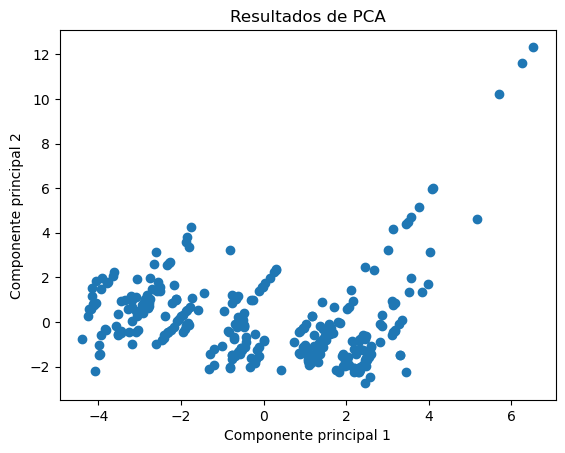

In [29]:
import matplotlib.pyplot as plt

plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Resultados de PCA')
plt.show()


In [30]:
from sklearn.cluster import DBSCAN

# Definir el modelo y ajustarlo a los datos
dbscan = DBSCAN(eps=1.5, min_samples=4)
dbscan.fit(df_pca)

# Obtener las etiquetas de cada punto
labels = dbscan.labels_

# Imprimir el número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Número de clusters encontrados:", n_clusters)
sum(labels<0)

Número de clusters encontrados: 1


4

In [31]:
resultado = df
resultado["cluster"] = labels
resultado['fncer'] = resultado['descripcion'].str.contains('FNCER|fncer|renovable|Renovable').astype(int)

##Revisando la informacion se encontro que se clasifico convocatorias que no son FNCER, por lo tanto se cambia su valor manualmente
resultado.loc[resultado['productos'] == 'CP-EDPC2022-004-PROD03', 'fncer'] = 0
resultado.loc[resultado['productos'] == 'CP-EDPC2022-004-PROD04', 'fncer'] = 0
resultado.loc[resultado['productos'] == 'CP-ESSC2022-001-PROD01', 'fncer'] = 0
resultado.loc[resultado['productos'] == 'CP-EDPC2022-004-PROD04', 'fncer'] = 0
# Cambiar tipo de columna a categórico y asignar etiquetas "Si" y "No"
resultado['fncer'] = resultado['fncer'].map({1: 'Si', 0: 'No'}).astype('category')


resultado.to_excel("resultado3.xlsx", encoding='utf-8', index=False)

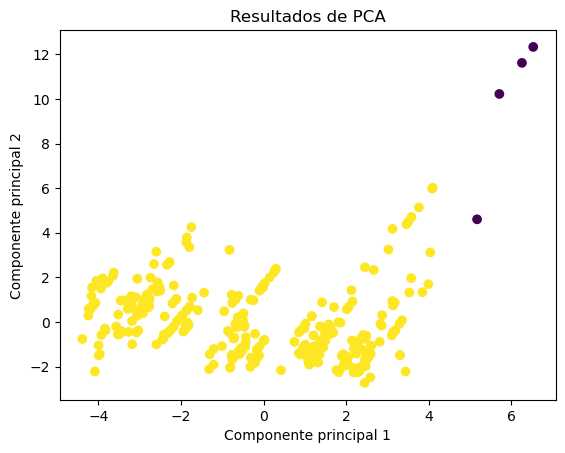

In [32]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Resultados de PCA')
plt.show()

## Analisis exploratorio de las variables

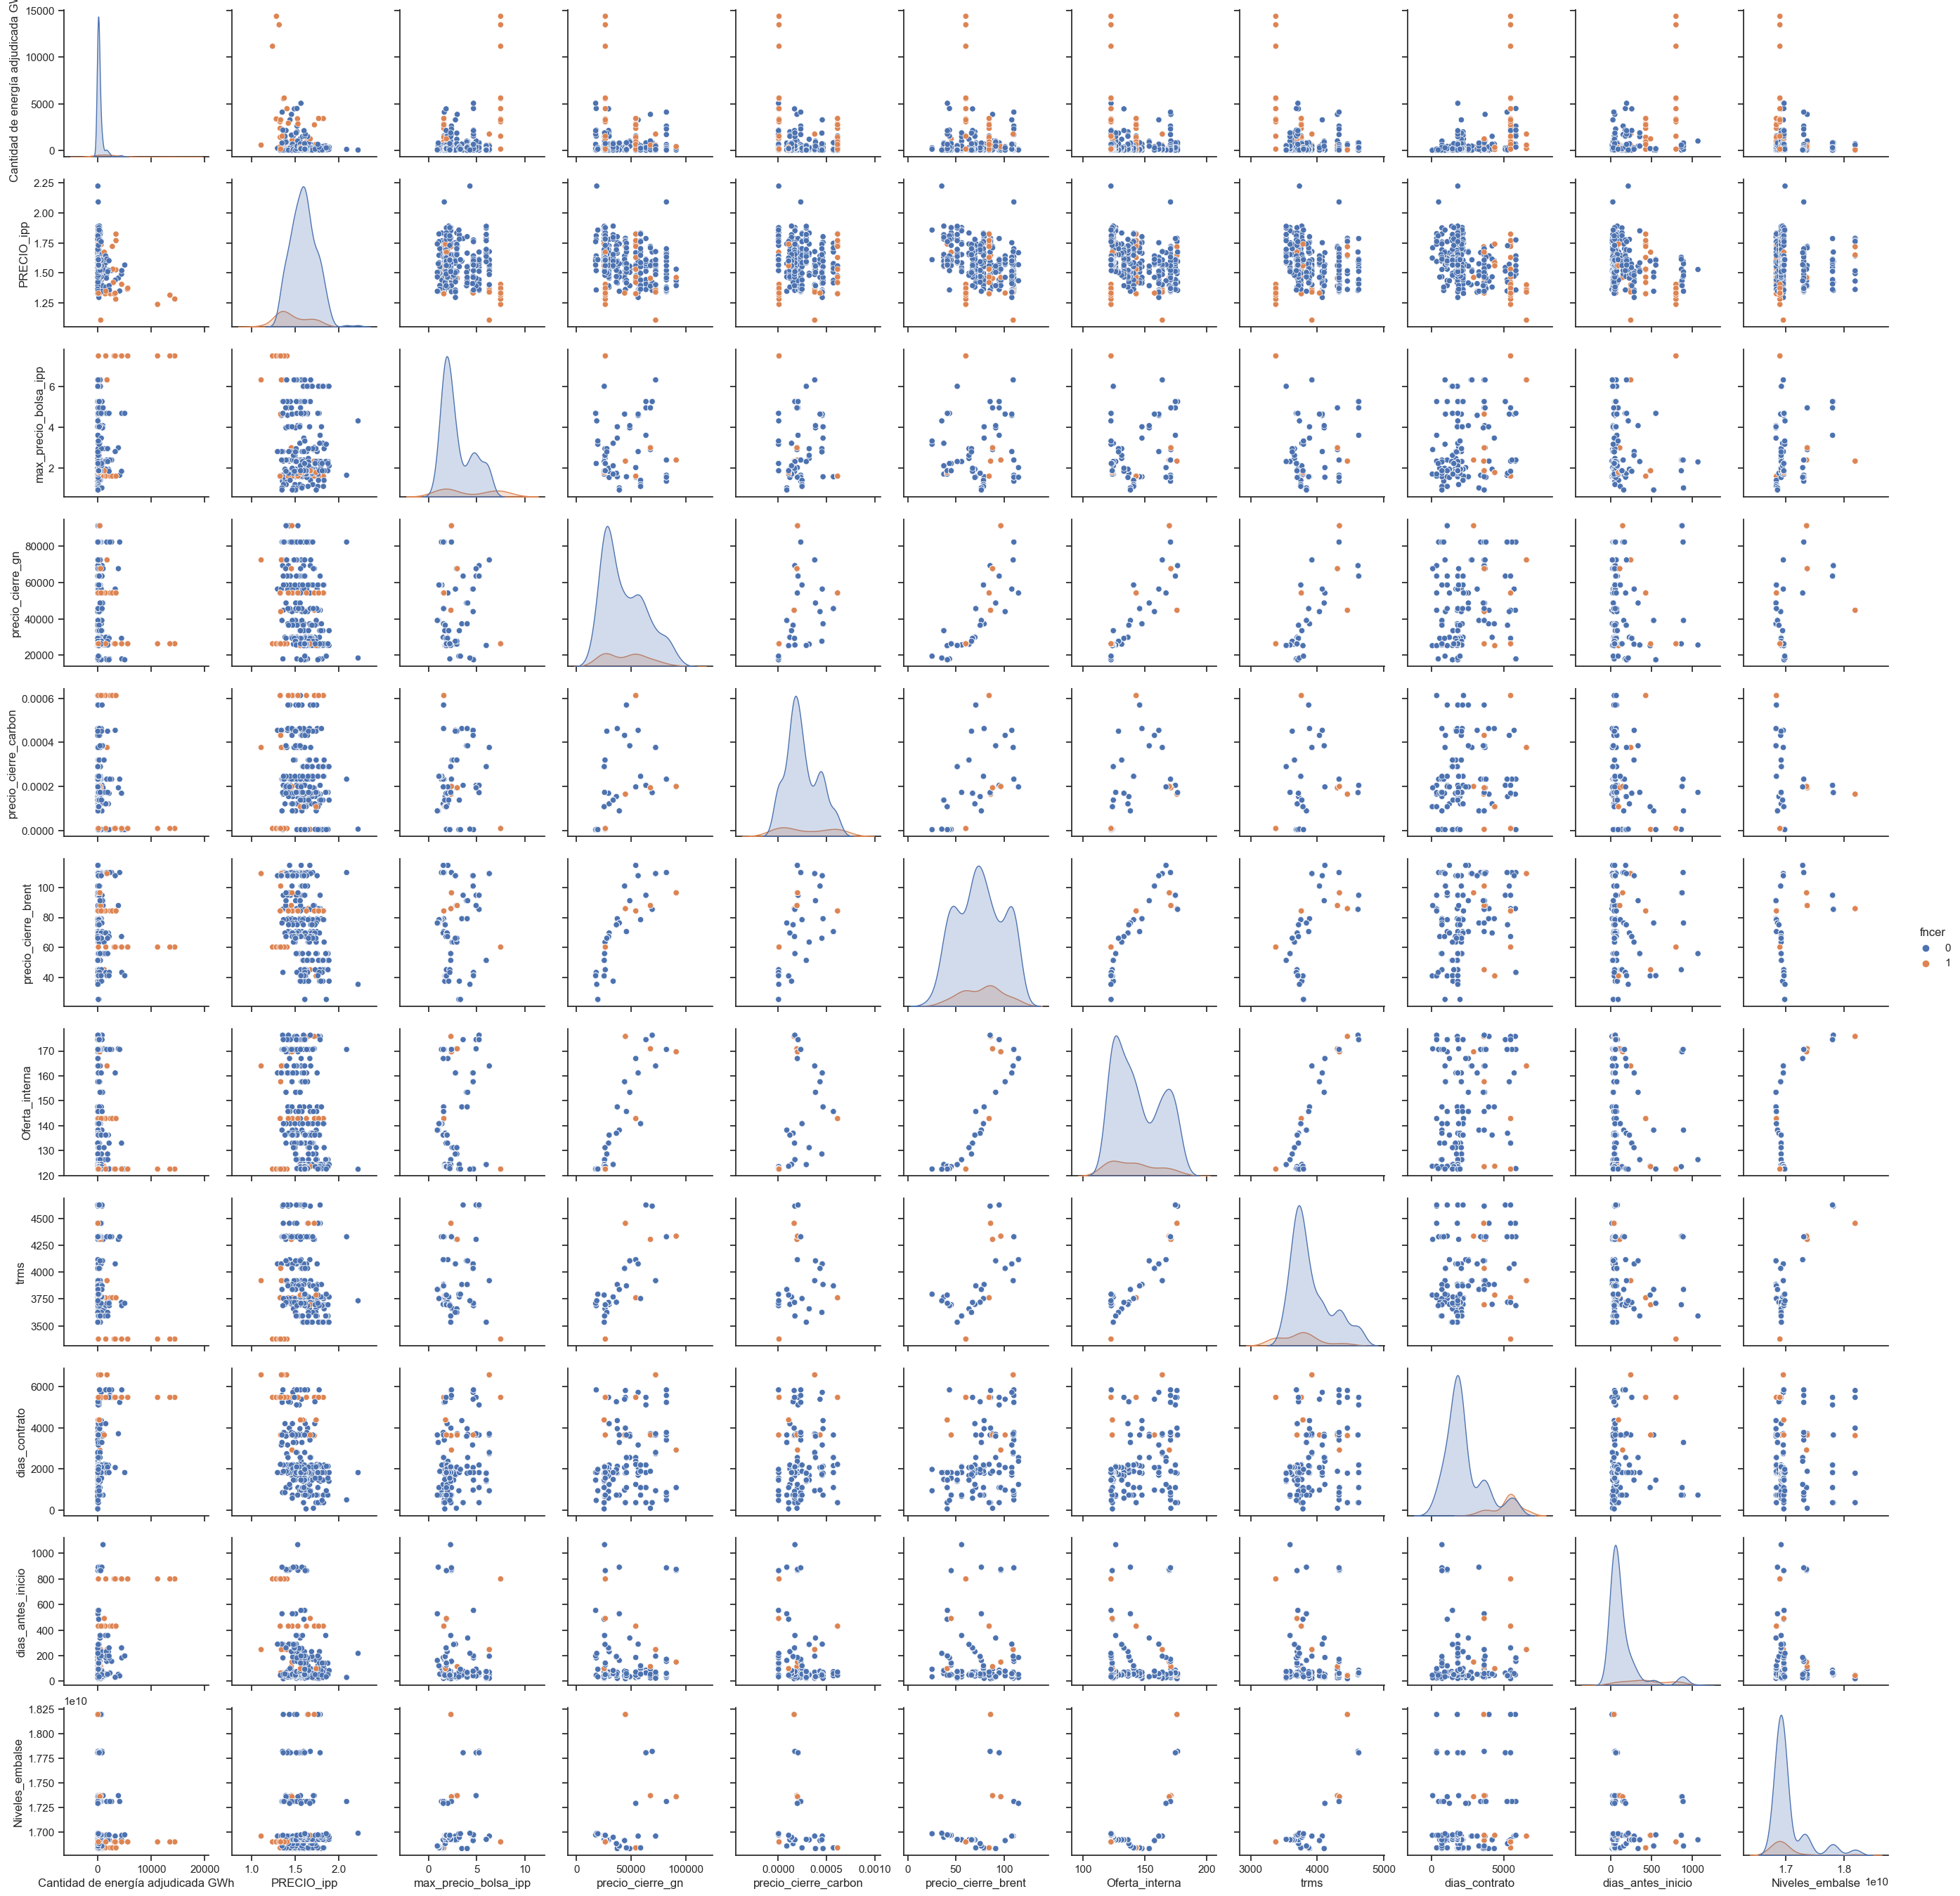

In [33]:
import seaborn as sns

df['fncer'] = df['descripcion'].str.contains('FNCER|fncer|renovable|Renovable').astype(int)

df_grafica = df[["Cantidad de energía adjudicada GWh","PRECIO_ipp", 'max_precio_bolsa_ipp',
                'precio_cierre_gn','precio_cierre_carbon','precio_cierre_brent', 'IPP', 'TRM',"dias_contrato","dias_antes_inicio","fncer","Niveles_embalse"]]
sns.set(style="ticks")
sns.pairplot(df_grafica, hue="fncer");

In [34]:
df.columns

Index(['Cantidad de energía demandada GWh',
       'Cantidad de energía adjudicada GWh',
       'Precio promedio ponderado adjudicado ($/KWh)', 'precio_cierre_gn',
       'precio_cierre_carbon', 'precio_cierre_brent', 'Oferta_interna', 'trms',
       'dias_contrato', 'dias_antes_inicio', 'Niveles_embalse',
       'max_precio_bolsa_ipp', 'precio_maximo_bolsa',
       'promedio_demanda_diaria', 'productos', 'descripcion',
       'energia_por_dia', 'PRECIO_ipp', 'cluster', 'fncer'],
      dtype='object')

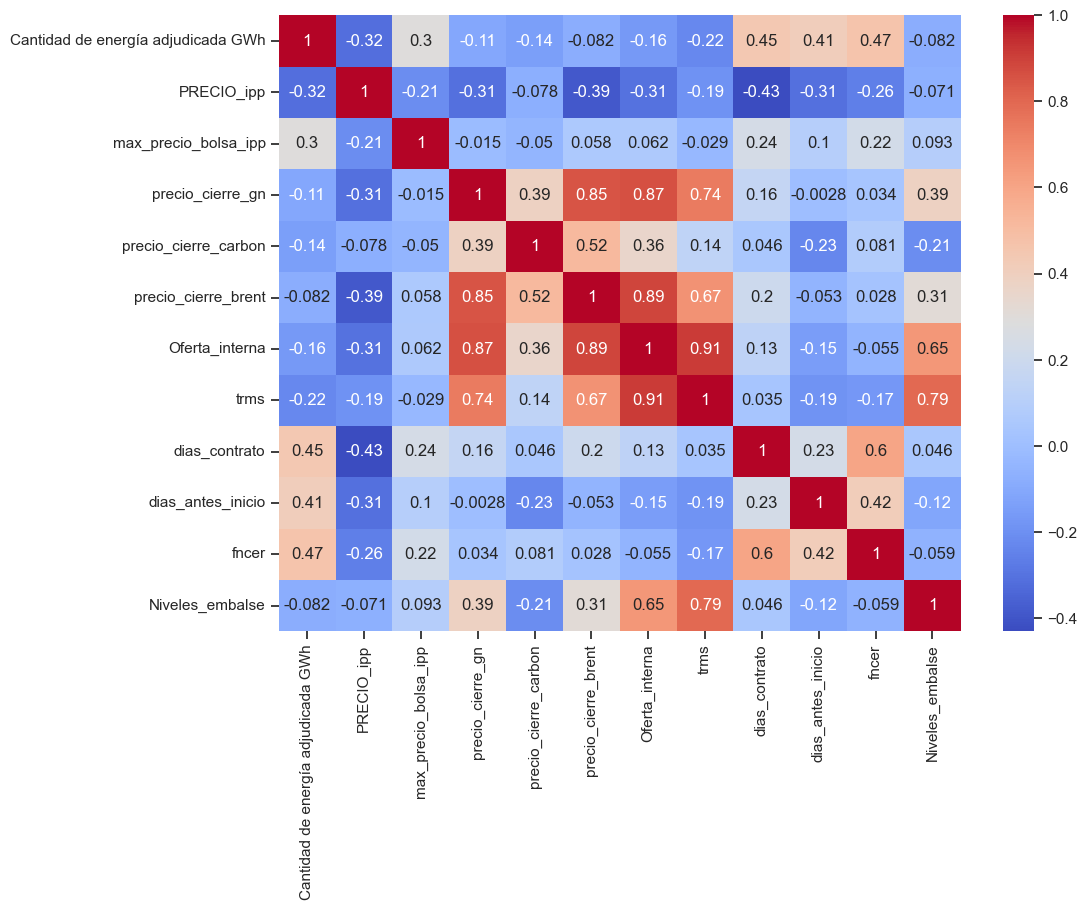

In [35]:
df_correlacion = df[["Cantidad de energía adjudicada GWh","PRECIO_ipp",'max_precio_bolsa_ipp',
                'precio_cierre_gn','precio_cierre_carbon','precio_cierre_brent', 'IPP',
                  'TRM',"dias_contrato","dias_antes_inicio","fncer","Niveles_embalse"]]

# Calcula la matriz de correlación
corr_matrix = df_correlacion.corr()

# Crea el mapa de calor de las correlaciones
fig, ax = plt.subplots(figsize=(11,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt='.2g', annot_kws={"size": 12})
plt.show()

In [36]:
# Calcula las estadísticas descriptivas del dataframe
corr_stats = df_correlacion.describe()

# Muestra el resultado
print(corr_stats)

       Cantidad de energía adjudicada GWh  PRECIO_ipp  max_precio_bolsa_ipp  \
count                          320.000000  320.000000            320.000000   
mean                           648.270131    1.580494              3.097521   
std                           1546.637359    0.154231              1.768717   
min                              0.050000    1.107507              0.924322   
25%                             39.190000    1.467886              1.741676   
50%                            175.000000    1.584099              2.335982   
75%                            495.350000    1.678530              4.638106   
max                          14396.161978    2.224408              7.487445   

       precio_cierre_gn  precio_cierre_carbon  precio_cierre_brent  \
count         320.00000            320.000000           320.000000   
mean        44069.28125              0.000253            75.186875   
std         19279.21745              0.000177            23.130988   
min     

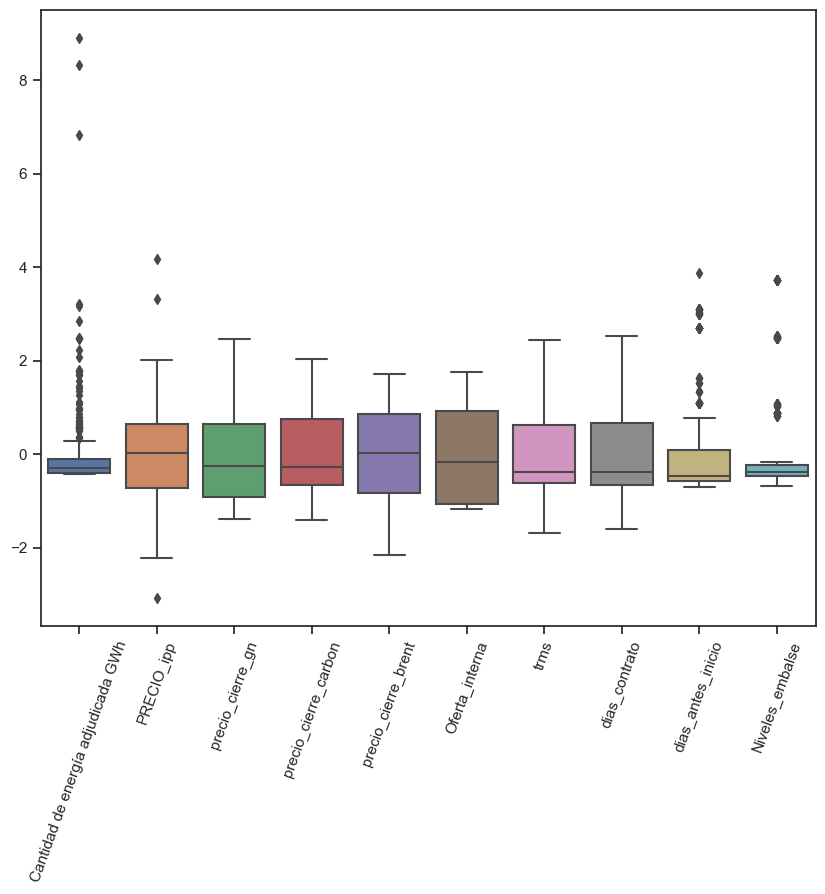

In [37]:
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Crea un objeto StandardScaler y ajusta los datos

df_correlacion = df[["Cantidad de energía adjudicada GWh","PRECIO_ipp",
                'precio_cierre_gn','precio_cierre_carbon','precio_cierre_brent', 'IPP', 'TRM',"dias_contrato","dias_antes_inicio","Niveles_embalse"]]
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_correlacion), columns=df_correlacion.columns)

# Crea una figura con un tamaño de 10x8 pulgadas
plt.figure(figsize=(10, 8))

# Crea un diagrama de caja para cada variable de la matriz de correlación
sns.boxplot(data=df_norm)

# Rota las etiquetas del eje x
plt.xticks(rotation=70)

# Muestra el gráfico
plt.show()



       Descripción
count   320.000000
mean      1.580494
std       0.154231
min       1.107507
25%       1.467886
50%       1.584099
75%       1.678530
max       2.224408


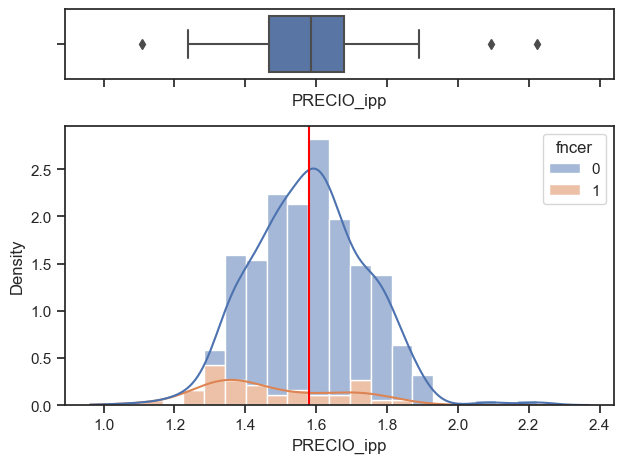

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columna = 'PRECIO_ipp'
# Descripción estadística en forma de tabla
description = df[columna].describe()
table = pd.DataFrame(description)
table.columns = ['Descripción']
print(table)

mask = df['fncer']  # Columna df.fncer como máscara

x = df[columna]

f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(x=x,  orient='h', ax=ax[0])
sns.histplot(data=df, x=columna, hue='fncer', multiple="stack", kde=True, stat="density", kde_kws=dict(cut=3), ax=ax[1])
ax[1].axvline(x.mean(), color='red')

plt.xlabel(columna)

plt.tight_layout()
plt.show()



## modelos de regresion

In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt


def funcion_grafica_principales(X,y,model,param_grid,titulo, xgboost = True):
    """ Funcion que busca hiperparametros y grafica importancia de las variables"""
    
    # Redirigir la salida estándar a un objeto "devnull"
    #os.devnull = open(os.devnull, 'w')
    
    # Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)

    # Obtener el mejor modelo y los mejores parámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print("Mejores parámetros encontrados:", best_params)

    # Calcular el MSE utilizando validación cruzada con el mejor modelo
    mse_scores = -cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Calcular el MSE promedio
    mse_mean = np.mean(mse_scores)

    print("MSE utilizando validación cruzada:", mse_mean)

    # Entrenar el mejor modelo con todos los datos
    best_model.fit(X, y)

    if xgboost == True :
    # Obtener la importancia de las características
        importance = best_model.feature_importances_
    else:
        importance = best_model.coef_


    # Obtener los nombres de las características
    feature_names = X.columns

    # Ordenar las importancias de mayor a menor
    sorted_indices = np.argsort(importance)[::-1]
    sorted_importance = importance[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Crear un gráfico de barras para visualizar la importancia de las características ordenadas
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_feature_names, sorted_importance)
    plt.xlabel('Importancia')
    plt.ylabel('Variable')
    plt.title(titulo)
    plt.show()

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

def funcion_grafica_principales(X,y,model,param_grid,titulo, xgboost = True):
    """ Funcion que busca hiperparametros y grafica importancia de las variables"""
    
    # Redirigir la salida estándar a un objeto "devnull"
    #os.devnull = open(os.devnull, 'w')
    
    # Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)

    # Obtener el mejor modelo y los mejores parámetros
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print("Mejores parámetros encontrados:", best_params)

    # Calcular el MSE utilizando validación cruzada con el mejor modelo
    mse_scores = -cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Calcular el MSE promedio
    mse_mean = np.mean(mse_scores)

    print("MSE utilizando validación cruzada:", mse_mean)

    # Entrenar el mejor modelo con todos los datos
    best_model.fit(X, y)

    if xgboost == True :
    # Obtener la importancia de las características
        importance = best_model.feature_importances_
    else:
        importance = best_model.coef_


    # Obtener los nombres de las características
    feature_names = X.columns

    # Ordenar las importancias de mayor a menor
    sorted_indices = np.argsort(importance)[::-1]
    sorted_importance = importance[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Crear un gráfico de barras para visualizar la importancia de las características ordenadas
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_feature_names, sorted_importance)
    plt.xlabel('Importancia')
    plt.ylabel('Variable')
    plt.title(titulo)
    plt.show()



In [41]:
##caso 1. con precio de la subasta y todas las variables
df_caso1 = df[["Cantidad de energía adjudicada GWh","Precio promedio ponderado adjudicado ($/KWh)",'max_precio_bolsa_ipp',
                'precio_cierre_gn','precio_cierre_carbon','precio_cierre_brent',
                  'TRM',"dias_contrato","dias_antes_inicio","fncer","Niveles_embalse"]]
df_caso1['IPP'] = df['IPP']

# Obtener los datos de entrada X y la variable objetivo y
X1 = df_caso1.drop("Precio promedio ponderado adjudicado ($/KWh)", axis=1)
y1 = df_caso1["Precio promedio ponderado adjudicado ($/KWh)"]



C:\Users\DELLPHOTO\AppData\Local\Temp\ipykernel_32780\1624286451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caso1['IPP'] = df['Oferta_interna']


In [42]:
## caso 2 con precio dividido por el IPP y todas las variables
#definimos las variables a utilizar
df_caso2 = df[["Cantidad de energía adjudicada GWh","PRECIO_ipp",'max_precio_bolsa_ipp',
                'precio_cierre_gn','precio_cierre_carbon','precio_cierre_brent',
                  'TRM',"dias_contrato","dias_antes_inicio","fncer","Niveles_embalse","energia_por_dia"]]
df_caso2['IPP'] = df['IPP']

# Obtener los datos de entrada X y la variable objetivo y
X2 = df_caso2.drop("PRECIO_ipp", axis=1)
y2 = df_caso2["PRECIO_ipp"]

C:\Users\DELLPHOTO\AppData\Local\Temp\ipykernel_32780\1416277290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caso2['IPP'] = df['Oferta_interna']


In [43]:
## caso 3 con precio dividido por el IPP y  las variables propias del contrato
#definimos las variables a utilizar
df_caso3 = df[["Cantidad de energía adjudicada GWh","PRECIO_ipp"
                  ,"dias_contrato","dias_antes_inicio","fncer","energia_por_dia"]]

# Obtener los datos de entrada X y la variable objetivo y
X3 = df_caso3.drop("PRECIO_ipp", axis=1)
y3 = df_caso3["PRECIO_ipp"]


In [44]:
import os
os.environ["PATH"] += os.pathsep + 'D:\\Graphviz\\bin'  # Ruta de Graphviz en tu sistema

# Luego, continúa con el código para generar el gráfico del árbol de decisión
os.getcwd()

'g:\\Mi unidad\\Maestria\\Tesis\\DATA'

### XGBREGRESSOR

Caso 1

Mejores parámetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
MSE utilizando validación cruzada: 464.6099600486799


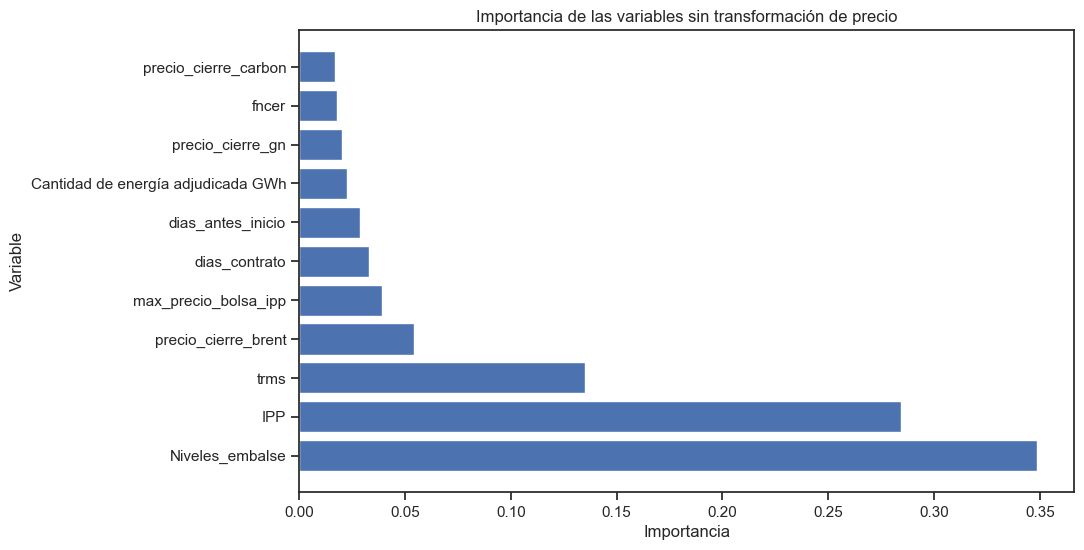

In [45]:
# Crear el modelo XGBoost
model = XGBRegressor(random_state=42)

# Definir los hiperparámetros a tunear
param_grid = {'n_estimators': [100, 500, 1000],
              'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7]}

#Definimos nombre de la grafica
titulo = 'Importancia de las variables sin transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X1,y1,model,param_grid,titulo)

Caso 2

Mejores parámetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
MSE utilizando validación cruzada: 0.04160972768591498


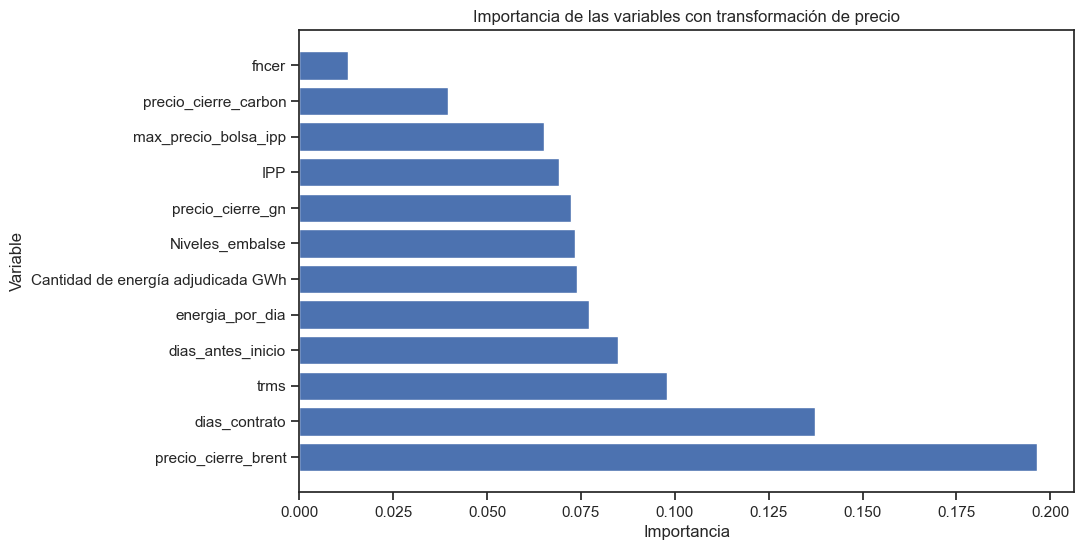

In [46]:
#Definimos nombre de la grafica
titulo = 'Importancia de las variables con transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X2,y2,model,param_grid,titulo)

Caso 3

Mejores parámetros encontrados: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
MSE utilizando validación cruzada: 0.023079230065930083


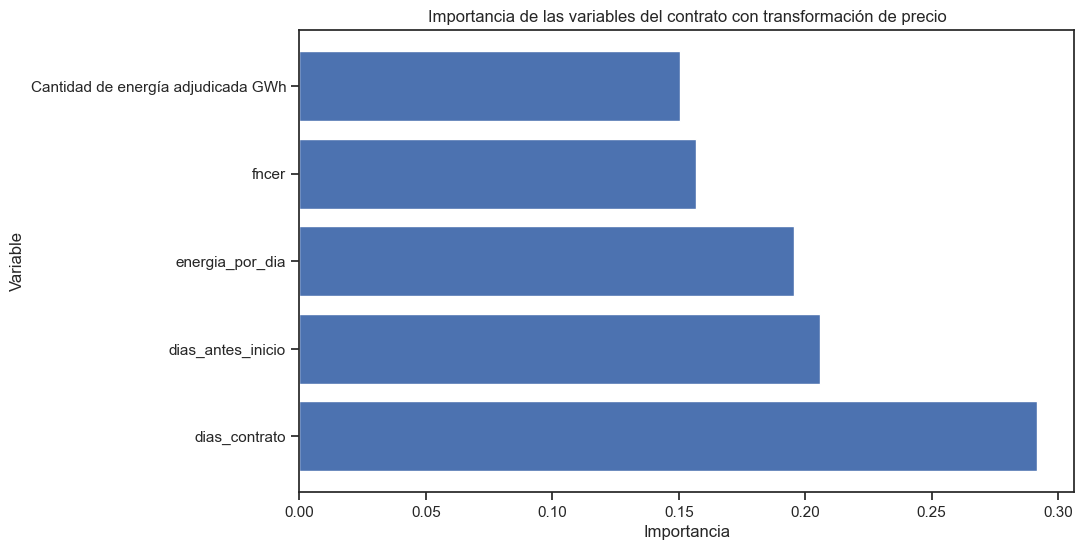

In [47]:
#Definimos nombre de la grafica
titulo = 'Importancia de las variables del contrato con transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X3,y3,model,param_grid,titulo)


### Regresion lineal con regularizacion

caso 1

Mejores parámetros encontrados: {'alpha': 0.01, 'l1_ratio': 0}
MSE utilizando validación cruzada: 678.7070628680476


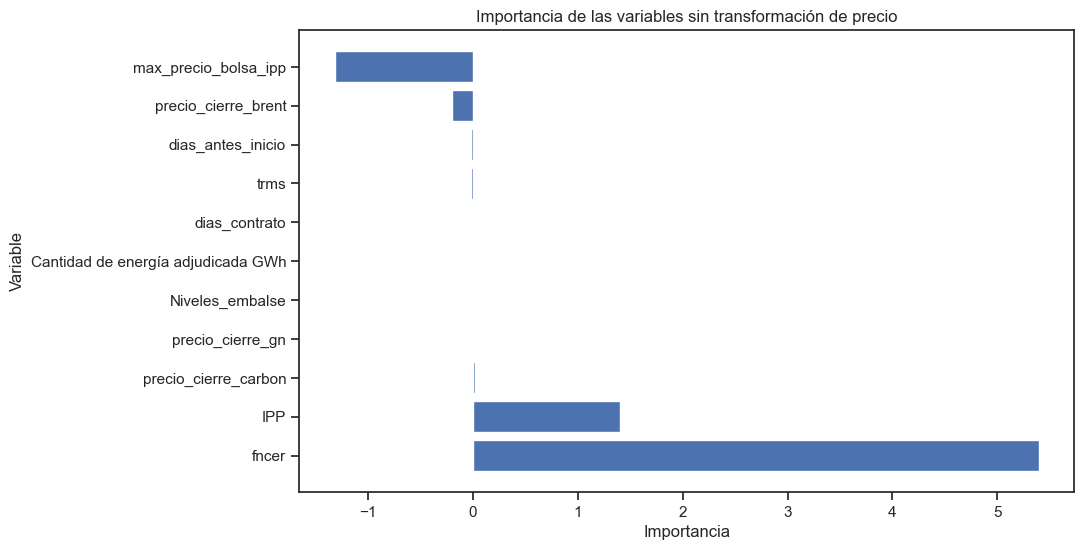

In [48]:
import warnings

# Ignorar los mensajes de advertencia
warnings.filterwarnings('ignore')

# Crear el modelo ElasticNet
model = ElasticNet(random_state=42)

# Definir los hiperparámetros a tunear
param_grid = {'alpha': [0.001,0.01,0.1, 1.0, 10.0],
              'l1_ratio': [0, 0.1, 0.5, 0.9, 1]}

#Definimos nombre de la grafica
titulo = 'Importancia de las variables sin transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X1,y1,model,param_grid,titulo, xgboost= False)

# Restaurar el comportamiento normal de las advertencias
warnings.filterwarnings('default')

Caso 2

Mejores parámetros encontrados: {'alpha': 0.1, 'l1_ratio': 0}
MSE utilizando validación cruzada: 0.023276484421682613


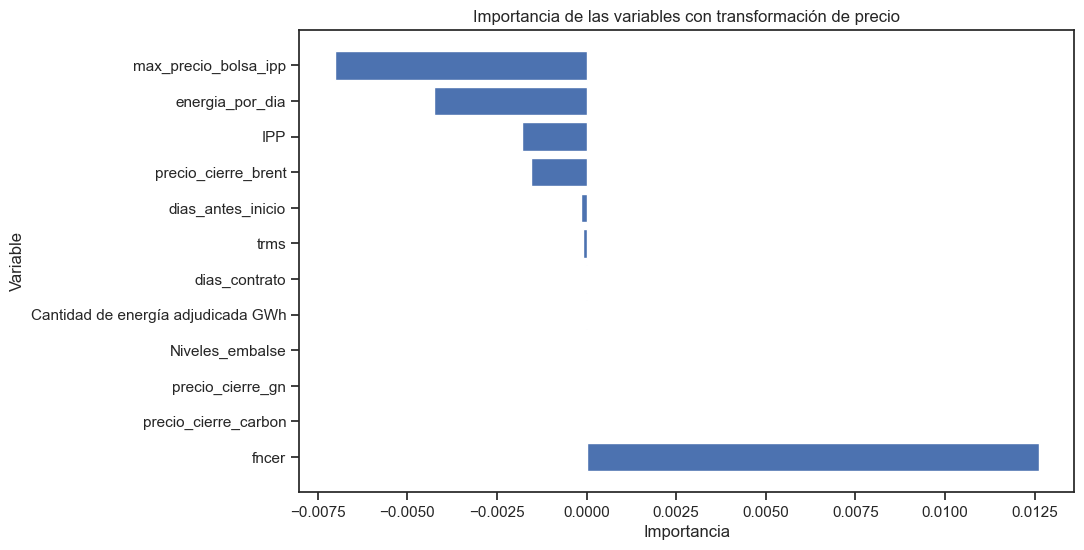

In [49]:
# Ignorar los mensajes de advertencia
warnings.filterwarnings('ignore')

#Definimos nombre de la grafica
titulo = 'Importancia de las variables con transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X2,y2,model,param_grid,titulo, xgboost= False)

# Restaurar el comportamiento normal de las advertencias
warnings.filterwarnings('default')

Caso 3

Mejores parámetros encontrados: {'alpha': 1.0, 'l1_ratio': 0.1}
MSE utilizando validación cruzada: 0.020411965836421218


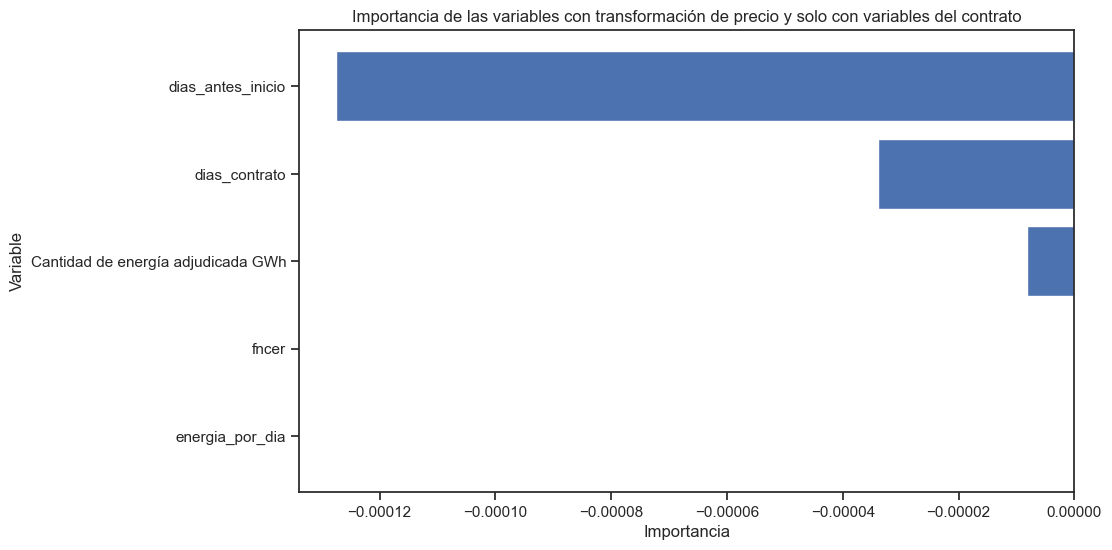

In [50]:
# Ignorar los mensajes de advertencia
warnings.filterwarnings('ignore')

#Definimos nombre de la grafica
titulo = 'Importancia de las variables con transformación de precio y solo con variables del contrato'

#aplicamos la funcion
funcion_grafica_principales(X3,y3,model,param_grid,titulo, xgboost= False)

# Restaurar el comportamiento normal de las advertencias
warnings.filterwarnings('default')

### SVM

Caso 1

In [51]:
"""from sklearn.svm import SVR
# Crear el modelo ElasticNet
model = SVR()

# Definir los hiperparámetros a tunear
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10]}
              #'gamma': ['scale', 'auto']}

#Definimos nombre de la grafica
titulo = 'Importancia de las variables sin transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X1,y1,model,param_grid,titulo)"""


"from sklearn.svm import SVR\n# Crear el modelo ElasticNet\nmodel = SVR()\n\n# Definir los hiperparámetros a tunear\nparam_grid = {'kernel': ['linear', 'poly', 'rbf'],\n              'C': [0.1, 1, 10]}\n              #'gamma': ['scale', 'auto']}\n\n#Definimos nombre de la grafica\ntitulo = 'Importancia de las variables sin transformación de precio'\n\n#aplicamos la funcion\nfuncion_grafica_principales(X1,y1,model,param_grid,titulo)"

Caso 2

In [52]:
"""
#Definimos nombre de la grafica
titulo = 'Importancia de las variables con transformación de precio'
#aplicamos la funcion
funcion_grafica_principales(X2,y2,model,param_grid,titulo)
"""

"\n#Definimos nombre de la grafica\ntitulo = 'Importancia de las variables con transformación de precio'\n#aplicamos la funcion\nfuncion_grafica_principales(X2,y2,model,param_grid,titulo)\n"

Caso 3

In [53]:
"""
#Definimos nombre de la grafica
titulo = 'Importancia de las variables con transformación de precio y solo con variables del contrato'

#aplicamos la funcion
funcion_grafica_principales(X3,y3,model,param_grid,titulo)
"""

"\n#Definimos nombre de la grafica\ntitulo = 'Importancia de las variables con transformación de precio y solo con variables del contrato'\n\n#aplicamos la funcion\nfuncion_grafica_principales(X3,y3,model,param_grid,titulo)\n"

### RandomForestRegressor

Caso 1

Mejores parámetros encontrados: {'max_depth': 5, 'n_estimators': 1000}
MSE utilizando validación cruzada: 619.835976199758


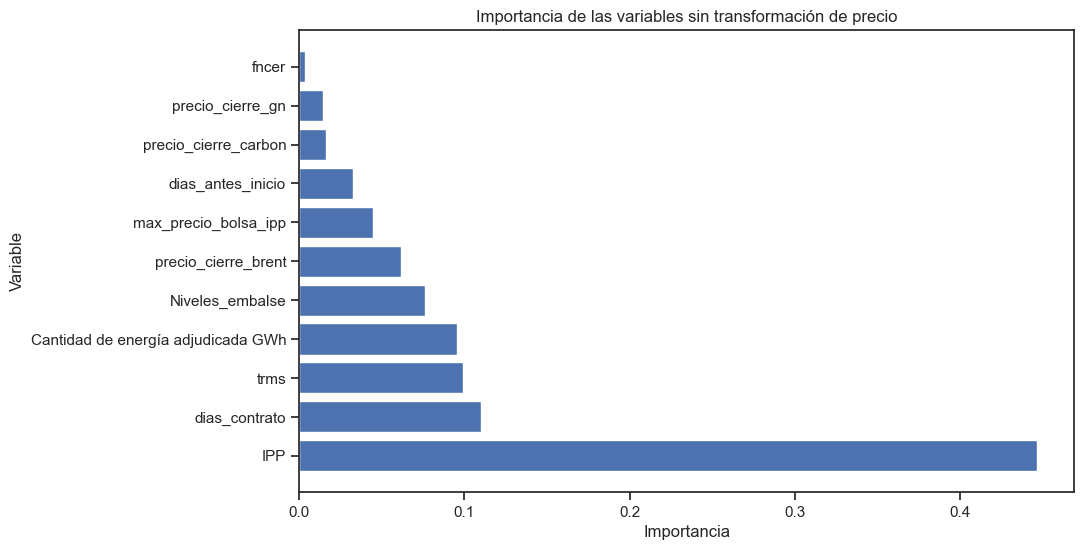

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a tunear
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7]}

#Definimos nombre de la grafica
titulo = 'Importancia de las variables sin transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X1,y1,model,param_grid,titulo)

Caso 2

Mejores parámetros encontrados: {'max_depth': 5, 'n_estimators': 500}
MSE utilizando validación cruzada: 0.019866071507572906


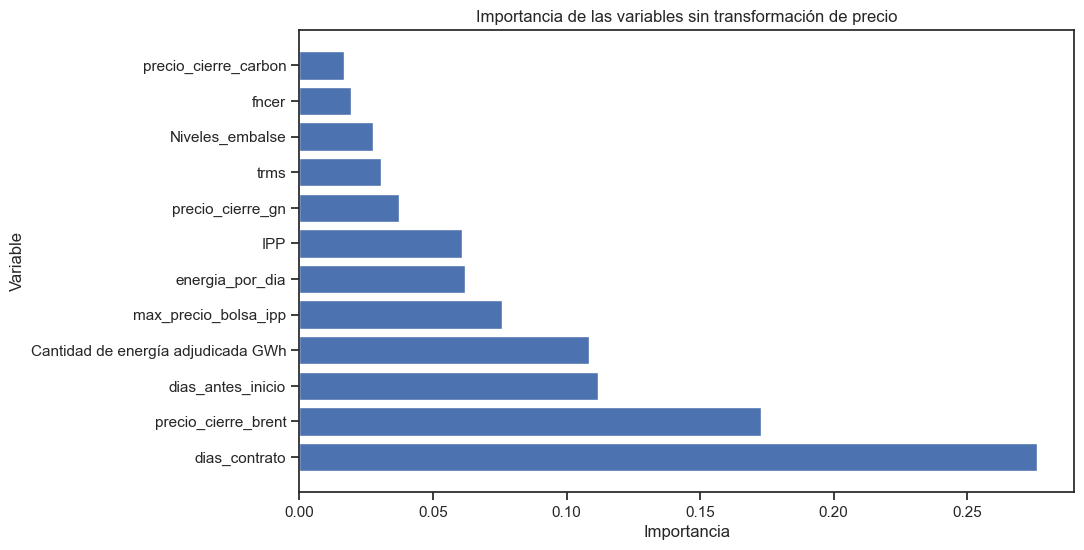

In [55]:
#Definimos nombre de la grafica
titulo = 'Importancia de las variables sin transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X2,y2,model,param_grid,titulo)

Caso 3

Mejores parámetros encontrados: {'max_depth': 3, 'n_estimators': 500}
MSE utilizando validación cruzada: 0.022639295854130676


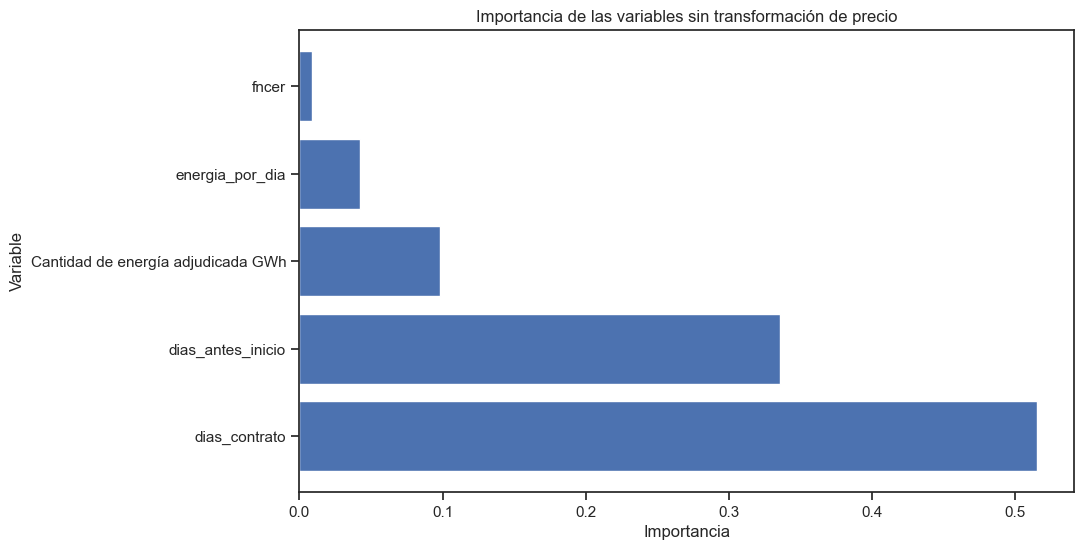

In [56]:
#Definimos nombre de la grafica
titulo = 'Importancia de las variables sin transformación de precio'

#aplicamos la funcion
funcion_grafica_principales(X3,y3,model,param_grid,titulo)